Todos:

1. Sparse vs Dense Vector
2. Text Processing fucntions
3. adding validation split

A sparse vector is a vector in which most of the elements are zero. Only a few elements have non-zero values.

A dense vector is a vector in which most elements are non-zero. All values are explicitly stored.

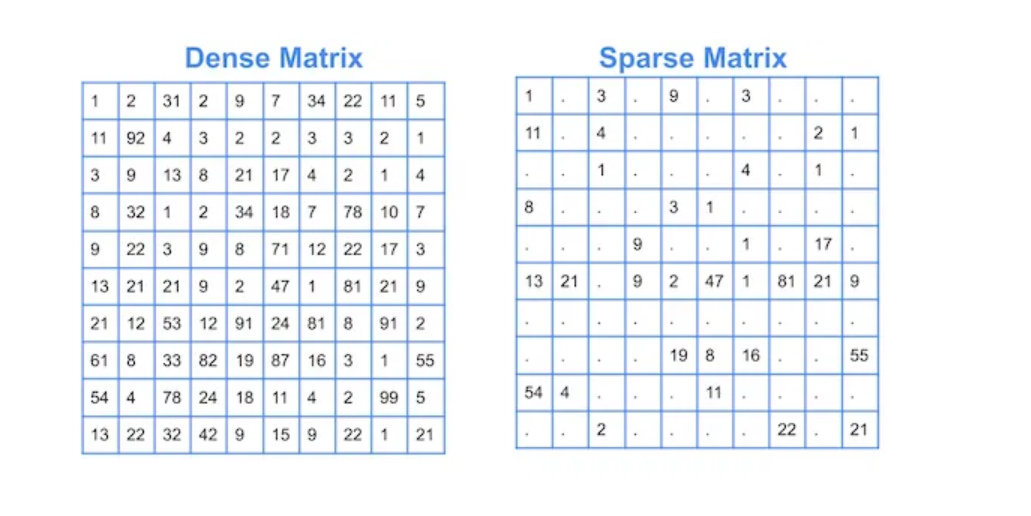

In [7]:
text = "1. Check out, this amazing article 123: https://example.com/article1 #AI, #Tech, 123321"

In [8]:
text= text.lower()
print("converted to lower: ", text)

converted to lower:  1. check out, this amazing article 123: https://example.com/article1 #ai, #tech, 123321


In [9]:
import re

text= re.sub(r'http\S+', '', text)
print(f"URL removed: {text}")

URL removed: 1. check out, this amazing article 123:  #ai, #tech, 123321


In [10]:
text= re.sub(r'[^a-zA-z\s]', "", text)
print(f"left with only alphabets: {text}")

left with only alphabets:  check out this amazing article   ai tech 


In [11]:
text= re.sub(r'\s+', " ", text).strip()
print(f"removes any extra white spaces: {text}")

removes any extra white spaces: check out this amazing article ai tech


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
df= pd.read_csv("Corona_NLP_train.csv", encoding= "latin-1")

In [14]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [15]:
df.shape

(41157, 6)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [17]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [18]:
cleaned_df= df.dropna(axis=1)

In [19]:
cleaned_df.duplicated().sum()

0

In [20]:
cleaned_df.columns

Index(['UserName', 'ScreenName', 'TweetAt', 'OriginalTweet', 'Sentiment'], dtype='object')

In [21]:
cleaned_df.head()

,UserName,ScreenName,TweetAt,OriginalTweet,Sentiment
0,3799,48751,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [22]:
cleaned_df["Sentiment"].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [23]:
cleaned_df["Sentiment"].value_counts()

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

In [24]:
cleaned_df.head(40)

,UserName,ScreenName,TweetAt,OriginalTweet,Sentiment
0,3799,48751,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [25]:
cleaned_df["Sentiment"]= cleaned_df["Sentiment"].replace({
    "Extremely Positive": "Positive",
    "Extremely Negative": "Negative"    
})

C:\Users\HP\AppData\Local\Temp\ipykernel_780\1205389596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["Sentiment"]= cleaned_df["Sentiment"].replace({


In [26]:
cleaned_df["Sentiment"].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [27]:
cleaned_df["Sentiment"].value_counts()

Sentiment
Positive    18046
Negative    15398
Neutral      7713
Name: count, dtype: int64

In [28]:
#Preprocessing

import re

def clean_tweet(text):
    text= text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    return text 

In [29]:
cleaned_df["OriginalTweet"]= cleaned_df["OriginalTweet"].apply(clean_tweet)

C:\Users\HP\AppData\Local\Temp\ipykernel_780\857100813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["OriginalTweet"]= cleaned_df["OriginalTweet"].apply(clean_tweet)


In [30]:
cleaned_df.head()

,UserName,ScreenName,TweetAt,OriginalTweet,Sentiment
0,3799,48751,16-03-2020,menyrbie philgahan chrisitv and and,Neutral
1,3800,48752,16-03-2020,advice talk to your neighbours family to excha...,Positive
2,3801,48753,16-03-2020,coronavirus australia woolworths to give elder...,Positive
3,3802,48754,16-03-2020,my food stock is not the only one which is emp...,Positive
4,3803,48755,16-03-2020,me ready to go at supermarket during the covid...,Negative


In [31]:
#Label Encoding

le= LabelEncoder()
cleaned_df["Sentiment"]= le.fit_transform(cleaned_df["Sentiment"])

C:\Users\HP\AppData\Local\Temp\ipykernel_780\1889702726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["Sentiment"]= le.fit_transform(cleaned_df["Sentiment"])


In [32]:
cleaned_df.head()

,UserName,ScreenName,TweetAt,OriginalTweet,Sentiment
0,3799,48751,16-03-2020,menyrbie philgahan chrisitv and and,1
1,3800,48752,16-03-2020,advice talk to your neighbours family to excha...,2
2,3801,48753,16-03-2020,coronavirus australia woolworths to give elder...,2
3,3802,48754,16-03-2020,my food stock is not the only one which is emp...,2
4,3803,48755,16-03-2020,me ready to go at supermarket during the covid...,0


In [33]:
#Splitting

X= cleaned_df["OriginalTweet"].values
y= cleaned_df["Sentiment"].values

In [34]:
#20% test, 80% train

X_temp, X_test, y_temp, y_test= train_test_split(X, y, test_size=0.2, random_state=42)



#0.25 * 80 = 20% val, 80% train
X_train, X_val, y_train, y_val= train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [35]:
#Tokenization
tokenizer= Tokenizer(num_words=10000, oov_token="<OOV>") 
tokenizer.fit_on_texts(X_train) ##{'<OOV>': 1, 'tweet': 2, 'beautiful': 3, 'programming'}

X_train_sequences= tokenizer.texts_to_sequences(X_train) #[[12,3,3], [1,25,5]]
X_val_sequences= tokenizer.texts_to_sequences(X_val)
X_test_sequences= tokenizer.texts_to_sequences(X_test)

In [36]:
X_train_sequences[0]

[12,
 25,
 185,
 244,
 3,
 277,
 6,
 52,
 3,
 59,
 7,
 1642,
 1726,
 6401,
 2645,
 37,
 4769,
 4770,
 25,
 185,
 244,
 3,
 277,
 6,
 52,
 3,
 59,
 7,
 1642,
 1726,
 6401,
 2645,
 37,
 4769,
 4770]

In [37]:
len(X_train_sequences[0])

35

In [38]:
#padding
max_length= 100
X_train_padded= pad_sequences(X_train_sequences, maxlen= max_length, padding="post")
X_val_padded= pad_sequences(X_val_sequences, maxlen= max_length, padding= "post")
X_test_padded= pad_sequences(X_test_sequences, maxlen=max_length, padding="post")

In [39]:
X_train_padded[0]

array([  12,   25,  185,  244,    3,  277,    6,   52,    3,   59,    7,
       1642, 1726, 6401, 2645,   37, 4769, 4770,   25,  185,  244,    3,
        277,    6,   52,    3,   59,    7, 1642, 1726, 6401, 2645,   37,
       4769, 4770,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [40]:
len(X_train_padded[0])

100

In [57]:
#Building ANN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten, BatchNormalization

In [66]:
model= Sequential()
#input_dim=10000: Size of the vocabulary ... 10,000 words.
#output_dim=128: Dimensionality of the dense embedding vectors.
#input_length=max_length=100: Length of the input sequences

model.add(Embedding(input_dim=10000, output_dim=128, input_length= max_length))

#Converts the 2D output of the embedding layer (sequence length x embedding size) into a 1D vector
model.add(Flatten())

model.add(Dense(64, activation="relu"))

#Batch normalization helps stabilize and accelerate training by normalizing the
#inputs of each layer, which can improve model performance and generalization.
model.add(BatchNormalization())

#Regularizes the model to prevent overfitting
model.add(Dropout(0.5))

model.add(Dense(32, activation="relu"))

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(3, activation="softmax"))

In [67]:
model.compile(loss= "sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics= ["accuracy"]
              )

In [68]:
model.build(input_shape=(None, max_length))  # None for batch size, max_length for sequence length
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │       819,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,101,827 (8.02 MB)

 Trainable params: 2,101,635 (8.02 MB)

 Non-trainable params: 192 (768.00 B)

In [69]:
#training the model

model.fit(X_train_padded,
          y_train,
          epochs= 5,
          validation_data= (X_val_padded, y_val),
          batch_size= 32
          )

Epoch 1/5
772/772 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.4016 - loss: 1.3342 - val_accuracy: 0.5768 - val_loss: 0.8837
Epoch 2/5
772/772 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6870 - loss: 0.7430 - val_accuracy: 0.5888 - val_loss: 1.1406
Epoch 3/5
772/772 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8618 - loss: 0.3938 - val_accuracy: 0.6651 - val_loss: 0.8657
Epoch 4/5
772/772 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9271 - loss: 0.2202 - val_accuracy: 0.7065 - val_loss: 0.9790
Epoch 5/5
772/772 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.9524 - loss: 0.1482 - val_accuracy: 0.7012 - val_loss: 1.0978


In [70]:
loss, accuracy= model.evaluate(X_test_padded, y_test)
print(f"Total Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7116 - loss: 1.0843
Total Loss: 1.0761648416519165
Test Accuracy: 0.7112487554550171
